In [1]:
#Dependencies
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura/Datasets Latinamerica
!ls

/content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura/Datasets Latinamerica
 compare_datasets.ipynb
 data_preprocessing_summary.gsheet
 filter_papers_full_document_review.ipynb
 filter_papers_title_abstract_review.ipynb
 Final_Documents.csv
 Final_Documents.gsheet
 get_own_dataset_papers.ipynb
 latin_america_full_paper_review.csv
 latin_america_full_paper_review.gsheet
'Latin America.gdoc'
 latin_america_review_abstract_title.csv
 latin_america_review_abstract_title.gsheet
 PDF
 Plots
'Raw Search'


In [5]:
import gspread
from google.colab import auth
from google.auth import default

In [6]:
# Authenticate with Google Sheets API
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)
#client.list_spreadsheet_files()

In [7]:
# Replace the values in the following variables with your own values
SPREADSHEET_NAME = 'latin_america_full_paper_review'
SHEET_NAME = 'latin_america_full_paper_review'

# Open the Google Sheets file
sheet = client.open(SPREADSHEET_NAME).worksheet(SHEET_NAME)
# Convert the worksheet data to a list of lists
data = sheet.get_all_values()

# Convert the list of lists to a Pandas DataFrame
docs_final = pd.DataFrame(data[1:], columns=data[0])

docs_final

,Index,Exclude,Comments,Abstract,Title,Authors,Year,Source title,Cited by,DOI,...,Index Keywords,bothKeywords,Document Type,Source,country,Dataset name,Data type,open or credentialed,Own Dataset,Authors Nationality
0,11,No,Data analysis of breast cancer and mammography...,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,1,10.7189/jogh.12.04061,...,adult; aged; Brazil; breast tumor; cross-secti...,adult;aged;Brazil;breast tumor;cross-sectional...,Article,Scopus,Brazil,- Brazilian Institute of Geography and Statist...,Tabular,Open,No,Brazil
1,14,No,Analysis of transplants in Argentina. Using op...,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,0,10.1016/j.transproceed.2017.12.049,...,adult; Argentina; Article; child; comparative ...,adult;Argentina;Article;child;comparative stud...,Article,Scopus,Argentina,Liver transplant recipient: open database CRES...,Tabular,Open,No,Argentina
2,16,No,Predictive autoregressive model of covid: Data...,Different countries have adopted various contr...,Adaptive Multi-Factor Quantitative Analysis an...,"Pei Y., Li J., Xu S., Xu Y.",2022,Frontiers in Medicine,1,10.3389/fmed.2022.828691,...,SARS-CoV-2 vaccine; Article; Brazil; coronavir...,adaptive multi-factor model;COVID-19;social is...,Article,Scopus,"Uruguay, Cuba, Argentina, Dominican Republic, ...",- COVID-19 Dashboard by the Center for Systems...,Tabular,Open,No,China
3,18,No,Covid forecast: Dataset: Open covid-19 data se...,The current spreading of the SARS-CoV-2 pandem...,A Deep Learning Approach to Forecast SARS-CoV-...,"Aguilar, I.L., Ibanez-Reluz, M., Aguilar, J.C....",2021,"COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",0,10.1007/978-3-030-86970-0_22,...,,Deep learning;SARS-CoV-2;Temporal convolutiona...,Proceedings Paper,WoS,Peru,-Daily Covid-19 dataset: Ministry of Health in...,Tabular,Open,No,"Peru, Brazil"
4,20,No,Predictive autoregressive model of covid: They...,Here we present a discrete-time-evolution mode...,A discrete-time-evolution model to forecast pr...,"Curado E.M.F., Curado M.R.",2020,PLoS ONE,3,10.1371/journal.pone.0241472,...,Article; asymptomatic infection; Brazil; case ...,Article;asymptomatic infection;Brazil;case stu...,Article,Scopus,"Uruguay, Cuba, Argentina, Dominican Republic, ...",Johns Hopkins University: Coronavirus Research...,Tabular,Open,No,"Brazil, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,526,Yes,"They use 3 datasets: INbreast (Portugal), CBIS...",The implementation of deep learning-based comp...,A real use case of semi-supervised learning fo...,"Calderon-Ramirez S, Murillo-Hernandez D, Rojas...",2022,Med Biol Eng Comput,,10.1007/s11517-021-02497-6,...,,,,Pubmed,Costa Rica,,,,,
182,531,No,They use samples of expression profiles from 8...,Abstract\nThe most frequently diagnosed histol...,Molecular Differences between Squamous Cell Ca...,"Campos-Parra AD, Pérez-Quintanilla M, Martínez...",2022,Curr Oncol,,10.3390/curroncol29070372,...,,,,Pubmed,Mexico,GEO GSE56303,Genomics,Open,No,8 Mexico
183,532,No,Clinical data available in the public database...,"Children, although mostly affected mildly or a...",Predictors of ICU Admission in Children with C...,"Cárdenas-Rojas MI, Guzmán-Esquivel J, Murillo-...",2023,J Clin Med,,10.3390/jcm12103593,...,,,,Pubmed,Mexico,COVID-19 Dataset (datos abiertos bases histori...,Tabular,Open,No,3 Mexico
184,536,No,They include non-american subjects and a datab...,Genes in the noncanonical WNT signaling pathwa...,Burden of rare deleterious variants in WNT sig...,"Hebert L, Hillman P, Baker C, Brown M, Ashley-...",2020,PLoS One,,10.1371/journal.pone.0239083,...,,,,Pubmed,"Includes Mexican Americans, Puerto Ricans, Med...",Genome Aggregation Database gn

### Filter the file

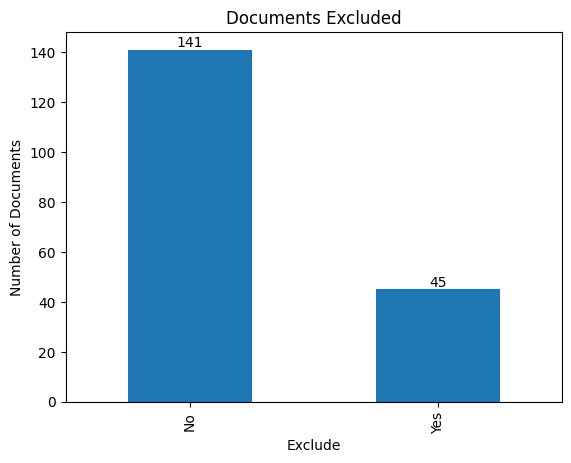

In [8]:
# Count the occurrences of each value
value_counts = docs_final.Exclude.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Exclude')
plt.ylabel('Number of Documents')
plt.title('Documents Excluded')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Exclude Full Paper')

# Display the plot
plt.show()

In [9]:
# Take the docs with Accepted = Yes
docs_final = docs_final[docs_final['Exclude'] == 'No']

In [10]:
docs_index = [int(doc_index) for doc_index in docs_final.Index.to_list()]
print(f'The number of accepted is {len(docs_index)}')

The number of accepted is 141


### Filter Columns

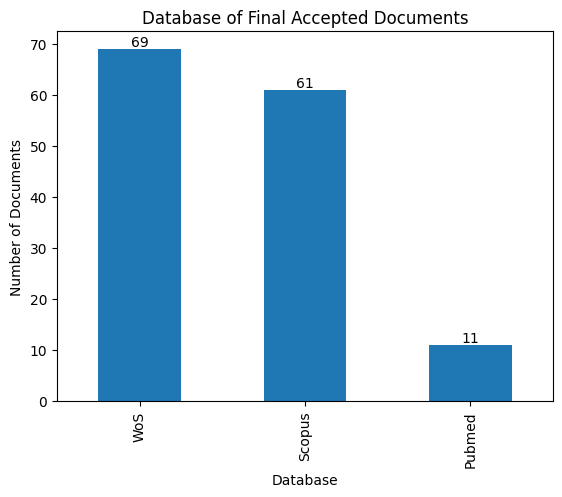

In [11]:
# Count the occurrences of each value
value_counts = docs_final.Source.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Database')
plt.ylabel('Number of Documents')
plt.title('Database of Final Accepted Documents')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Per DB.tiff', dpi=300, format='tiff')
# Display the plot
plt.show()

### Cleaning

In [12]:
print(f'Initial Columns: {len(docs_final.columns)}')

cols_to_keep = ['Index', 'Abstract', 'Title', 'Authors', 'Year',
                'Source title', 'Cited by', 'DOI', 'Link', 'Affiliations',
                'Author Keywords', 'Index Keywords', 'bothKeywords',
                'country', 'Dataset name', 'Data type',
                'open or credentialed', 'Own Dataset', 'Authors Nationality']

docs_final = docs_final[cols_to_keep]
print(f'Initial Columns: {len(docs_final.columns)}')

Initial Columns: 23
Initial Columns: 19


### Dataset Year

In [13]:
docs_final.Year = pd.to_numeric(docs_final.Year)

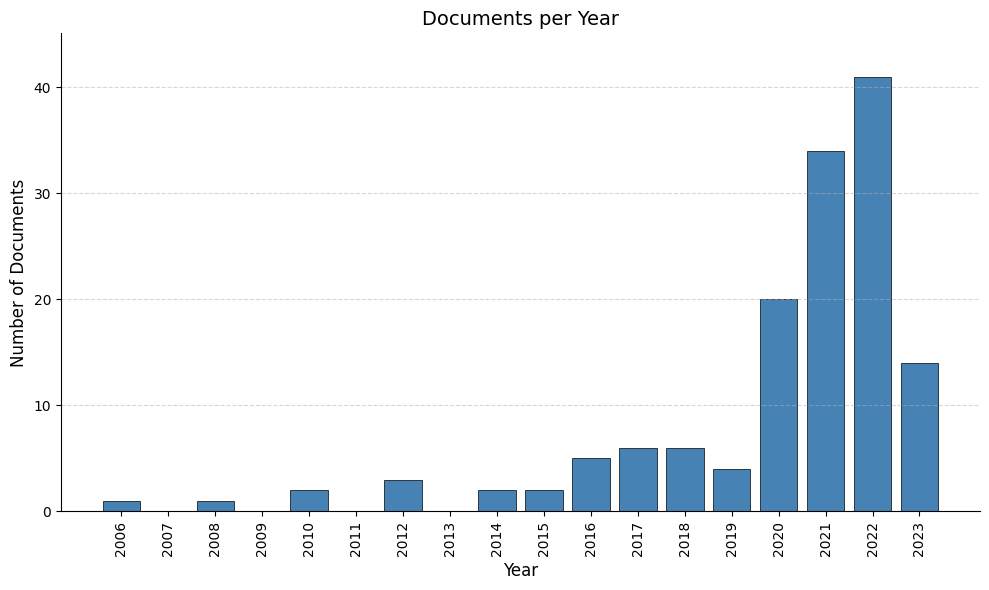

In [14]:
import matplotlib.pyplot as plt

# Assuming 'docs_final' is your DataFrame with the 'Year' column

# Get the minimum and maximum years from the DataFrame
min_year = docs_final['Year'].min()
max_year = docs_final['Year'].max()
# Count the occurrences of each year in the DataFrame
year_counts = docs_final['Year'].value_counts().sort_index()
# Create a range of years from the minimum to the maximum, inclusive
all_years = range(min_year, max_year + 1)
# Fill missing years with zero counts
year_counts = year_counts.reindex(all_years, fill_value=0)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram with customized aesthetics
plt.bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black', linewidth=0.5)

# Set the labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.title('Documents per Year', fontsize=14)

# Rotate and align the x-axis labels
plt.xticks(rotation=90, ha='center')
# Add labels to each year
plt.xticks(year_counts.index, rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the padding between the axis labels and the plot edges
plt.margins(0.05, 0.1)

# Display the plot
plt.tight_layout()

plt.savefig('Plots/Documents Per Year.tiff', dpi=300, format='tiff')
plt.savefig('Plots/Documents Per Year')
plt.show()

### Dataset Country

In [15]:
#countries_dict = {'Argentina':0, 'Bolivia':0, 'Brazil':0, 'Chile':0, 'Colombia':0, 'Ecuador':0, 'Guyana':0, 'Paraguay':0, 'Peru':0, 'Suriname':0, 'Uruguay':0, 'Venezuela':0}
countries_dict = {
    'Argentina': 0,
    'Bolivia': 0,
    'Brazil': 0,
    'Chile': 0,
    'Colombia': 0,
    'Costa Rica': 0,
    'Cuba': 0,
    'Dominican Republic': 0,
    'Ecuador': 0,
    'El Salvador': 0,
    'Guatemala': 0,
    'Guyana':0,
    'Haiti': 0,
    'Honduras': 0,
    'Mexico': 0,
    'Nicaragua': 0,
    'Panama': 0,
    'Paraguay': 0,
    'Peru': 0,
    'Puerto Rico': 0,
    'Suriname':0,
    'Uruguay': 0,
    'Venezuela': 0,
}


In [16]:
def clean_countries(countries):
  countries_str = ''
  count = 0
  for country in countries_dict.keys():
    if country.lower() in countries.lower():
      countries_dict[country] += 1
      if count == 0:
        count += 1
        countries_str = country
      else:
        countries_str = countries_str + ', ' + country
  return countries_str

In [17]:
dtypes_dict = {'Tabular':0, 'Text':0, 'Images': 0, 'Genomics':0, 'Signals':0}

In [18]:
def clean_type(dtype):
  dtype_str = ''
  count = 0
  if 'tab' in dtype.lower():
    dtypes_dict['Tabular'] += 1
    if count == 0:
      count += 1
      dtype_str = 'Tabular'
    else:
      dtype_str = dtype_str + ', ' + 'Tabular'
  elif ('image' in dtype.lower()) or ('geotiff' in dtype.lower()):
    dtypes_dict['Images'] += 1
    if count == 0:
      count += 1
      dtype_str = 'Images'
    else:
      dtype_str = dtype_str + ', ' + 'Images'
  elif ('text' in dtype.lower()):
    dtypes_dict['Text'] += 1
    if count == 0:
      count += 1
      dtype_str = 'Text'
    else:
      dtype_str = dtype_str + ', ' + 'Text'
  elif ('genom' in dtype.lower()):
    dtypes_dict['Genomics'] += 1
    if count == 0:
      count += 1
      dtype_str = 'Genomics'
    else:
      dtype_str = dtype_str + ', ' + 'Genomics'
  elif ('signal' in dtype.lower()):
    dtypes_dict['Signals'] += 1
    if count == 0:
      count += 1
      dtype_str = 'Signals'
    else:
      dtype_str = dtype_str + ', ' + 'Signals'

  return dtype_str

In [19]:
docs_final.country = docs_final.country.apply(clean_countries)
docs_final['open or credentialed'] = docs_final['open or credentialed'].apply(lambda x: 'Open' if x.lower() == 'open' else 'Credentialed')
docs_final['Data type'] = docs_final['Data type'].apply(clean_type)
docs_final.rename(columns={'open or credentialed': 'Open', 'Data type': 'Data_type'}, inplace=True)

In [20]:
countries_dict

{'Argentina': 18,
 'Bolivia': 17,
 'Brazil': 83,
 'Chile': 19,
 'Colombia': 32,
 'Costa Rica': 16,
 'Cuba': 17,
 'Dominican Republic': 16,
 'Ecuador': 19,
 'El Salvador': 16,
 'Guatemala': 17,
 'Guyana': 14,
 'Haiti': 3,
 'Honduras': 17,
 'Mexico': 47,
 'Nicaragua': 16,
 'Panama': 16,
 'Paraguay': 16,
 'Peru': 24,
 'Puerto Rico': 14,
 'Suriname': 13,
 'Uruguay': 16,
 'Venezuela': 17}

In [21]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


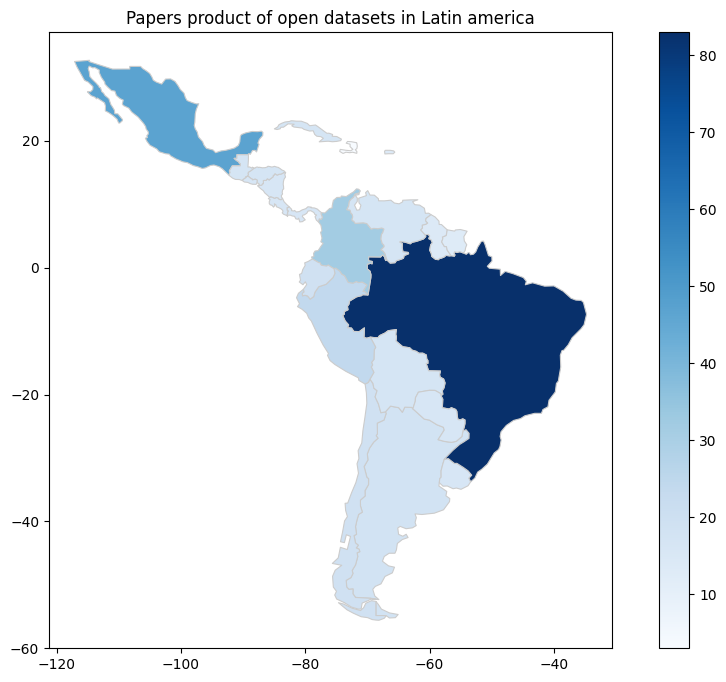

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a DataFrame from the dictionary
data = {'Country': list(countries_dict.keys()), 'Value': list(countries_dict.values())}
df = pd.DataFrame(data)

# Load the Latin America map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the map data with the DataFrame
merged = world.merge(df, left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title
plt.title('Papers product of open datasets in Latin america')

plt.savefig('Plots/Latin America Map.tiff', dpi=300, format='tiff')
plt.savefig('Plots/Latin America Map')

# Show the plot
plt.show()

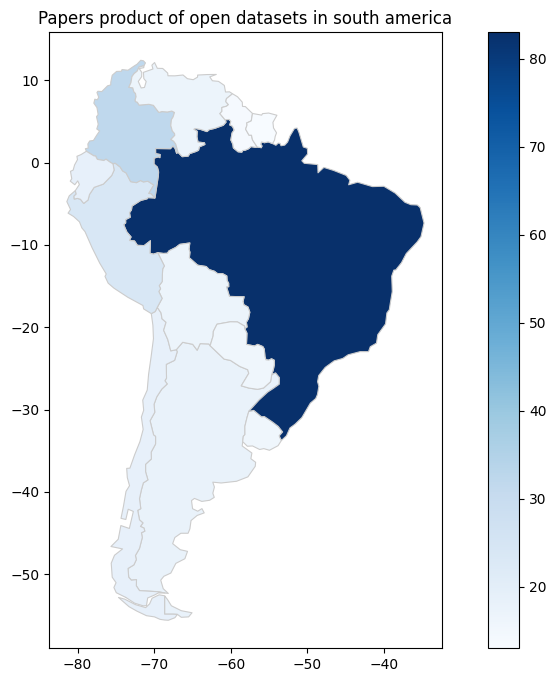

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a DataFrame from the dictionary
data = {'Country': list(countries_dict.keys()), 'Value': list(countries_dict.values())}
df = pd.DataFrame(data)

# Load the South America map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
south_america = world[world['continent'] == 'South America']

# Merge the map data with the DataFrame
merged = south_america.set_index('name').join(df.set_index('Country'))

# Plot the map with a different color map (e.g., 'OrRd')
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# OrRd

# Set the title
plt.title('Papers product of open datasets in south america')

plt.savefig('Plots/South America Map.tiff', dpi=300, format='tiff')
plt.savefig('Plots/South America Map')

# Show the plot
plt.show()

### Dataset Data Type

In [24]:
dtypes_dict

{'Tabular': 125, 'Text': 1, 'Images': 8, 'Genomics': 4, 'Signals': 2}

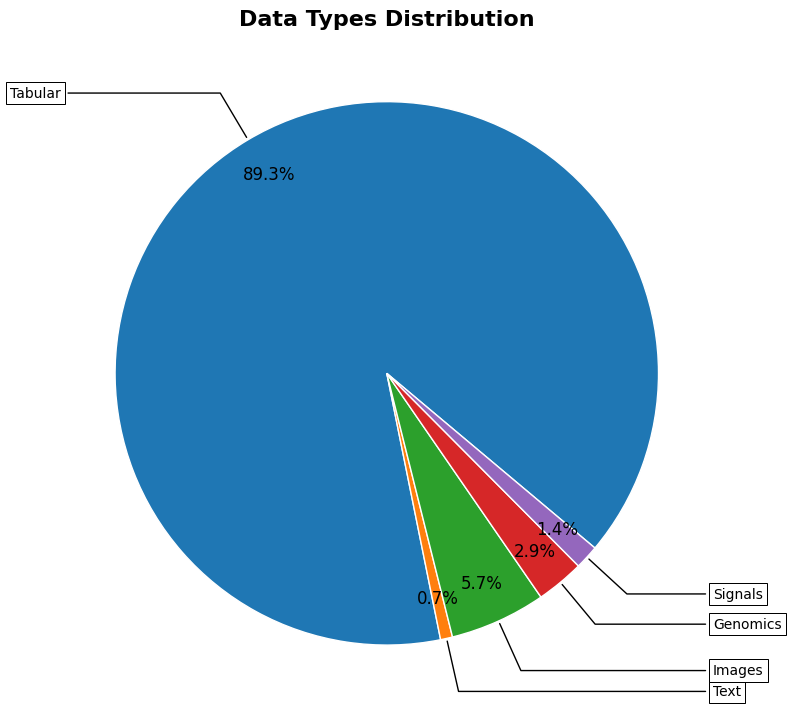

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dictionary values to a list
data = list(dtypes_dict.values())

# List of labels
labels = list(dtypes_dict.keys())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the pie chart
wedges, texts, autotexts = ax.pie(data, startangle=-40, colors=colors,
                                  autopct='%1.1f%%', pctdistance=0.85, textprops={'color': 'black', 'fontsize': 12})

# Customize wedge properties
for wedge in wedges:
    wedge.set_edgecolor('white')

# Customize text properties
for text in texts:
    text.set_fontsize(12)

# Annotation properties
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

# Annotate each wedge with labels
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Data Types Distribution", fontsize=16, fontweight='bold')

plt.tight_layout()

plt.savefig('Plots/Data Types Datasets.tiff', dpi=300, format='tiff')
plt.savefig('Plots/Data Types Datasets')
plt.show()

### Open Access

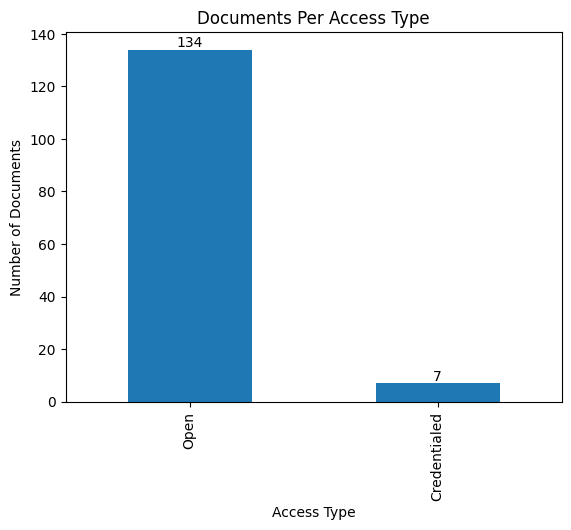

In [26]:
# Count the occurrences of each value
value_counts = docs_final.Open.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Access Type')
plt.ylabel('Number of Documents')
plt.title('Documents Per Access Type')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Per access type.tiff', dpi=300, format='tiff')
plt.savefig('Plots/Documents Per access type')
# Display the plot
plt.show()

In [27]:
import csv
#docs_final.to_csv('Final_Documents.csv', sep='\t', index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [28]:
docs_final

,Index,Abstract,Title,Authors,Year,Source title,Cited by,DOI,Link,Affiliations,Author Keywords,Index Keywords,bothKeywords,country,Dataset name,Data_type,Open,Own Dataset,Authors Nationality
0,11,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,1,10.7189/jogh.12.04061,https://www.scopus.com/inward/record.uri?eid=2...,CEPAM – Centro de Pesquisa Avançada em Medicin...,,adult; aged; Brazil; breast tumor; cross-secti...,adult;aged;Brazil;breast tumor;cross-sectional...,Brazil,- Brazilian Institute of Geography and Statist...,Tabular,Open,No,Brazil
1,14,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,0,10.1016/j.transproceed.2017.12.049,https://www.scopus.com/inward/record.uri?eid=2...,"Liver Transplant Unit, Hospital El Cruce, Flor...",,adult; Argentina; Article; child; comparative ...,adult;Argentina;Article;child;comparative stud...,Argentina,Liver transplant recipient: open database CRES...,Tabular,Open,No,Argentina
2,16,Different countries have adopted various contr...,Adaptive Multi-Factor Quantitative Analysis an...,"Pei Y., Li J., Xu S., Xu Y.",2022,Frontiers in Medicine,1,10.3389/fmed.2022.828691,https://www.scopus.com/inward/record.uri?eid=2...,"Clinical Data Center, Guangzhou Women and Chil...",adaptive multi-factor model; COVID-19; social ...,SARS-CoV-2 vaccine; Article; Brazil; coronavir...,adaptive multi-factor model;COVID-19;social is...,"Argentina, Bolivia, Brazil, Chile, Colombia, C...",- COVID-19 Dashboard by the Center for Systems...,Tabular,Open,No,China
3,18,The current spreading of the SARS-CoV-2 pandem...,A Deep Learning Approach to Forecast SARS-CoV-...,"Aguilar, I.L., Ibanez-Reluz, M., Aguilar, J.C....",2021,"COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",0,10.1007/978-3-030-86970-0_22,,"[Luis Aguilar, I] Natl Univ Piura, Dept Math, ...",Deep learning; SARS-CoV-2; Temporal convolutio...,,Deep learning;SARS-CoV-2;Temporal convolutiona...,Peru,-Daily Covid-19 dataset: Ministry of Health in...,Tabular,Open,No,"Peru, Brazil"
4,20,Here we present a discrete-time-evolution mode...,A discrete-time-evolution model to forecast pr...,"Curado E.M.F., Curado M.R.",2020,PLoS ONE,3,10.1371/journal.pone.0241472,https://www.scopus.com/inward/record.uri?eid=2...,"Centro Brasileiro de Pesquisas Físicas, Rio de...",,Article; asymptomatic infection; Brazil; case ...,Article;asymptomatic infection;Brazil;case stu...,"Argentina, Bolivia, Brazil, Chile, Colombia, C...",Johns Hopkins University: Coronavirus Research...,Tabular,Open,No,"Brazil, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,518,Introduction Poisoning remains a major worldwi...,Unintentional and self-poisoning mortalities i...,"Gonzalez-Santiago, O., Claudio, P.C.M.S., Cant...",2017,PLOS ONE,2,10.1371/journal.pone.0181708,,"[Gonzalez-Santiago, Omar; Morales-San Claudio,...",,UNITED-STATES; SUICIDE; HOSPITALIZATIONS; SEX,UNITED-STATES;SUICIDE;HOSPITALIZATIONS;SEX,Mexico,National Institute of Statistics and Geography...,Tabular,Open,No,Mexico
179,519,"Objective: Novel, inexpensive solutions are ne...",Use of Google Earth™ to strengthen public heal...,"Lozano-Fuentes S., Elizondo-Quiroga D., Farfan...",2008,Bulletin of the World Health Organization,63,10.2471/BLT.07.045880,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Microbiology, Immunology and Pat...",,"Animals; Arthropod Vectors; Databases, Factual...","Animals;Arthropod Vectors;Databases, Factual;D...",Mexico,Google Earth\nServicios de Salud de Yucatan an...,Tabular,Open,No,United States;Mexico;South Africa;United Kingdom
182,531,Abstract\nThe most frequently diagnosed histol...,Molecular Differences between Squamous Cell Ca...,"Campos-Parra AD, Pérez-Quintanilla M, Martínez...",20